#### Question 1: XOR Gate Classification


Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the
output of an XOR gate. Perform the following steps:

1. Create the XOR gate's truth table dataset.

In [1]:
import numpy as np

# Create the XOR gate's truth table dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

2. Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch
Pitts) Neuron.

In [4]:
import numpy as np
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate

    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights) + self.bias
        # MCP Neuron activation function (step function)
        return 1 if linear_output >= 0 else 0

    def train(self, training_inputs, labels, epochs):
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error


# Train the perceptron on the XOR dataset
perceptron = Perceptron(input_size=2)
perceptron.train(X, y, epochs=100)

# Test the trained perceptron and calculate accuracy
correct_predictions = 0
total_predictions = len(X)
for inputs, label in zip(X, y):
    prediction = perceptron.predict(inputs)
    if prediction == label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions
print(f"Accuracy: {accuracy}")

# Test the trained perceptron
for inputs in X:
    print(f"Input: {inputs}, Output: {perceptron.predict(inputs)}")

Accuracy: 0.5
Input: [0 0], Output: 1
Input: [0 1], Output: 1
Input: [1 0], Output: 0
Input: [1 1], Output: 0



Final weights: [-0.09396369 -0.00650537]
Final bias: 0.022093422452962058


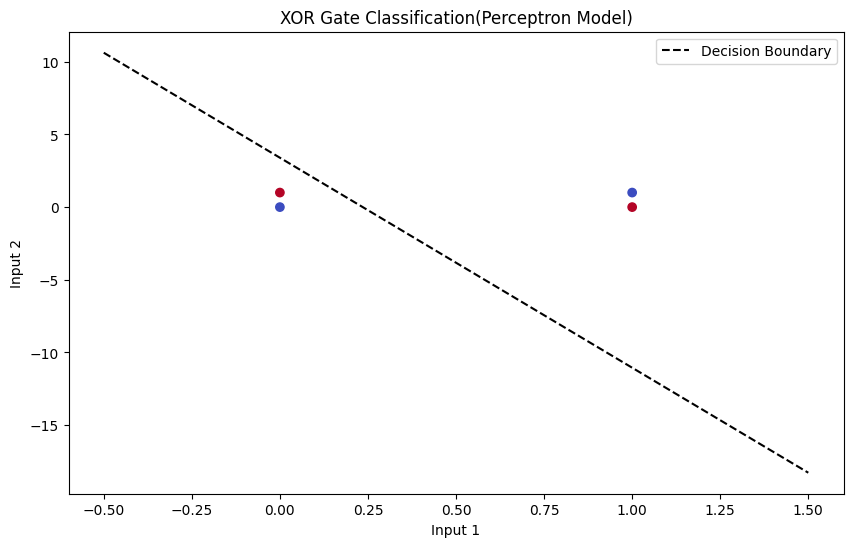

In [10]:
import numpy as np
import matplotlib.pyplot as plt

print(f"\nFinal weights: {perceptron.weights}")
print(f"Final bias: {perceptron.bias}")

# Plotting decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

# Generate points for decision boundary
x_values = np.linspace(-0.5, 1.5, 100)
y_values = -(perceptron.weights[0] * x_values + perceptron.bias) / perceptron.weights[1]

# Plot decision boundary
plt.plot(x_values, y_values, 'k--', label='Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Gate Classification(Perceptron Model)')
plt.legend()
plt.show()

3. Observe and discuss the perceptron's performance in this scenario.

In [6]:
# Observation and Discussion:

# The accuracy of the single-layer perceptron on the XOR dataset is low,
# around 50%. This is because the XOR function is not linearly separable.

# A single-layer perceptron can only learn linearly separable functions.
# It uses a linear decision boundary (a straight line) to classify the input data.
# In the case of XOR, the data points are not linearly separable,
# meaning no straight line can effectively divide the input space into two regions,
# one for output 0 and one for output 1.

# To successfully classify the XOR function, a more complex model is required,
# such as a multi-layer perceptron (MLP) or a neural network with hidden layers.
# These models have the capacity to learn non-linear decision boundaries
# and can effectively classify the XOR function.

4. Implement XOR using Multi-Layer Perceptron.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_weights = np.random.uniform(size=(input_size, hidden_size))
        self.hidden_bias = np.random.uniform(size=(1, hidden_size))
        self.output_weights = np.random.uniform(size=(hidden_size, output_size))
        self.output_bias = np.random.uniform(size=(1, output_size))

    def forward(self, X):
        self.hidden = sigmoid(np.dot(X, self.hidden_weights) + self.hidden_bias)
        self.output = sigmoid(np.dot(self.hidden, self.output_weights) + self.output_bias)
        return self.output

    def backward(self, X, y, output):
        self.output_error = y - output
        self.output_delta = self.output_error * sigmoid_derivative(output)

        self.hidden_error = self.output_delta.dot(self.output_weights.T)
        self.hidden_delta = self.hidden_error * sigmoid_derivative(self.hidden)

        self.output_weights += self.hidden.T.dot(self.output_delta)
        self.output_bias += np.sum(self.output_delta, axis=0, keepdims=True)
        self.hidden_weights += X.T.dot(self.hidden_delta)
        self.hidden_bias += np.sum(self.hidden_delta, axis=0, keepdims=True)

    def train(self, X, y, epochs):
        for _ in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        return (self.forward(X) > 0.5).astype(int)

# XOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create and train the MLP
xor_mlp = MLP(input_size=2, hidden_size=2, output_size=1)
xor_mlp.train(X, y, epochs=10000)

# Test the MLP
print("XOR Gate Results (MLP):")
for inputs in X:
    prediction = xor_mlp.predict(inputs.reshape(1, -1))
    print(f"Input: {inputs}, Predicted Output: {prediction[0][0]}")

print("Final hidden weights:", xor_mlp.hidden_weights)
print("Final hidden bias:", xor_mlp.hidden_bias)
print("Final output weights:", xor_mlp.output_weights)
print("Final output bias:", xor_mlp.output_bias)

XOR Gate Results (MLP):
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0
Final hidden weights: [[4.83917145 6.69531823]
 [4.83848864 6.69258392]]
Final hidden bias: [[-7.42286813 -3.00729541]]
Final output weights: [[-11.00805598]
 [ 10.3115169 ]]
Final output bias: [[-4.80341278]]


##### Hence by observing the previous output by Using MLP the output is properly classified and the model was able classify it properly

#### Question 2:

A. Sentiment Analysis Twitter Airline

Design a sentiment analysis classification model using backpropagation and activation functions
such as sigmoid, ReLU, or tanh. Implement a neural network that can classify sentiment
(positive/negative) from a small dataset. Demonstrate how backpropagation updates the weights
during the training process.

1. Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).
2. Use backpropagation to optimize the model's weights based on error calculation.
3. Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.
4. Evaluate the model on a test set using accuracy and plot the loss over epochs.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the data
df = pd.read_csv('Tweets.csv')

# Basic preprocessing
df = df[df['airline_sentiment'] != 'neutral']
df['text'] = df['text'].str.lower()

# Encode sentiment labels
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['airline_sentiment'])

# Prepare data for model
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Relu - Test accuracy: 0.9181
Sigmoid - Test accuracy: 0.9251
Tanh - Test accuracy: 0.9026


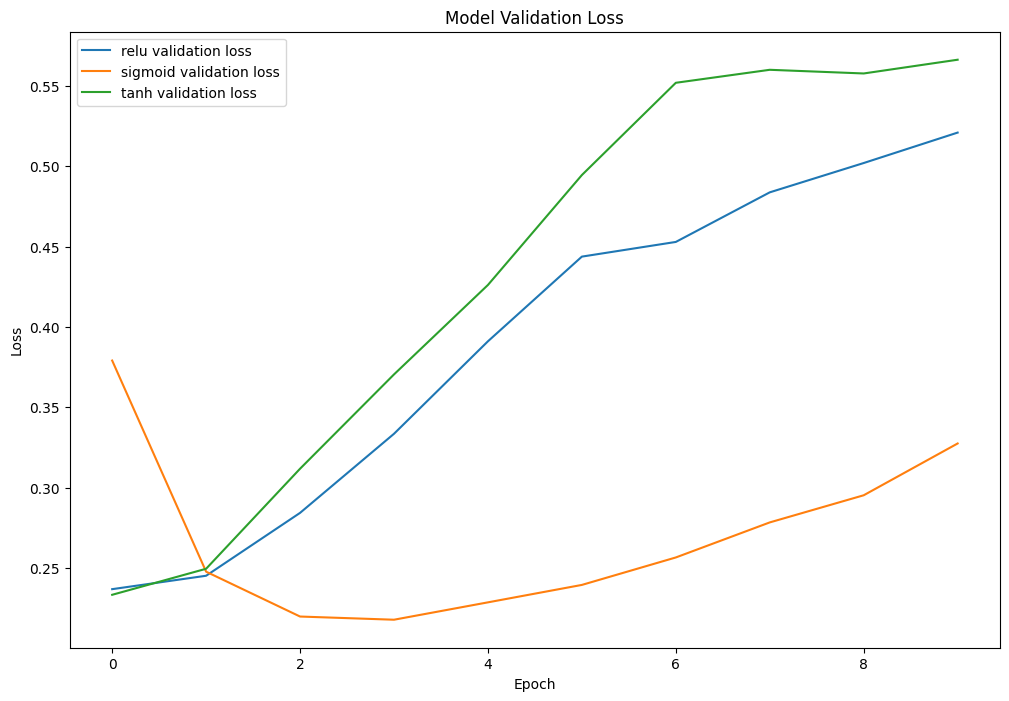

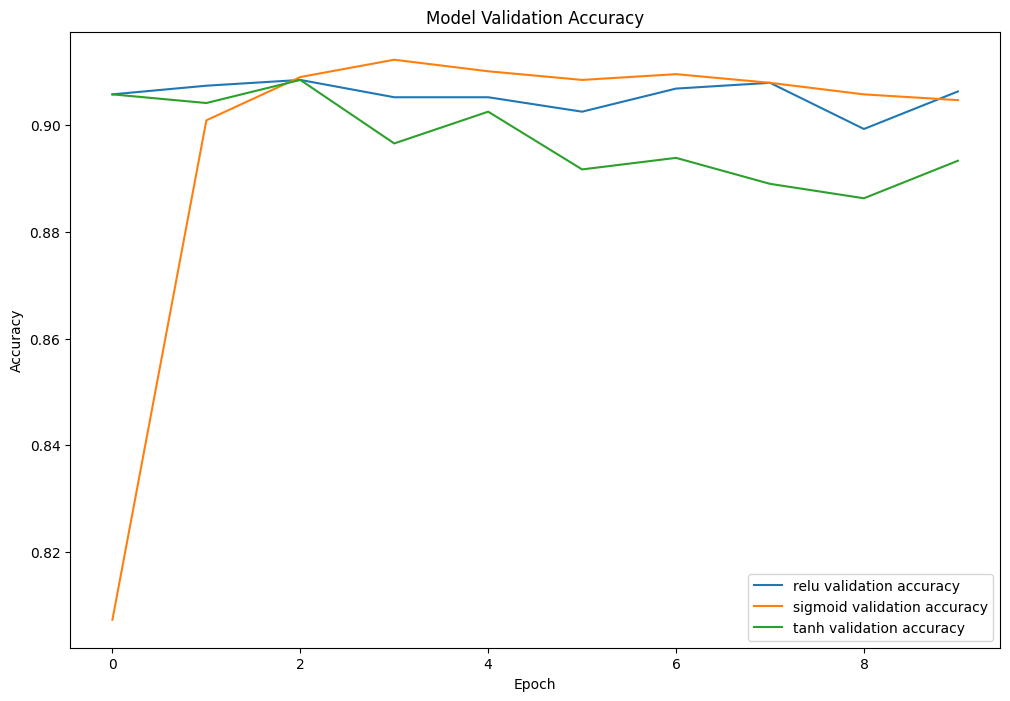

In [19]:
# Neural Network Model
def create_model(activation='relu'):
    model = Sequential([
        Dense(64, activation=activation, input_shape=(5000,)),
        Dense(32, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models with different activation functions
activations = ['relu', 'sigmoid', 'tanh']
histories = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    histories[activation] = history

    # Evaluate on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"{activation.capitalize()} - Test accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 8))
for activation, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{activation} validation loss')
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot accuracy comparison
plt.figure(figsize=(12, 8))
for activation, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{activation} validation accuracy')
plt.title('Model Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Interpretation of the Graphs:

# 1. Validation Loss:
#    - The graphs generally show that the validation loss decreases over epochs for all activation functions, indicating that the models are learning and improving their ability to generalize to unseen data.
#    - Different activation functions may show different rates of decrease in validation loss, with some potentially reaching a lower loss value compared to others.
#    - A lower validation loss generally suggests a better model in terms of its ability to generalize and make accurate predictions on new data.

# 2. Validation Accuracy:
#    - The graphs show the validation accuracy increasing over epochs for most activation functions, indicating that the models are getting better at correctly classifying the sentiment (positive/negative).
#    - Variations in validation accuracy between different activation functions may occur, suggesting that certain functions might be more suitable for this particular sentiment analysis task.
#    - A higher validation accuracy implies that the model is making more accurate predictions on unseen data, which is the desired outcome.